# Initial Analysis - CMU Movie Corpus Dataset

In [ ]:
import pandas as pd
import numpy as np
import statsmodels as sts
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from concurrent.futures import ThreadPoolExecutor, as_completed
import seaborn as sns


In [ ]:
plot_summaries_path = './Data/plot_summaries.txt'
movie_metadata_path = './Data/movie.metadata.tsv'
character_metadata_path = './Data/character.metadata.tsv'
tv_tropes_path = './Data/tvtropes.clusters.txt'
name_clusters_path = './Data/name.clusters.txt'

In [ ]:
plot_summaries = pd.read_csv(plot_summaries_path, sep='\t', header=None, names=['movie_wikipedia_id', 'plot_summary'])
movie_metadata = pd.read_csv(movie_metadata_path, sep='\t', header=None, names=['movie_wikipedia_id', 'movie_freebase_id', 'movie_name', 'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres'])
character_metadata = pd.read_csv(character_metadata_path, sep='\t', header=None, names=['movie_wikipedia_id', 'movie_freebase_id', 'movie_release_date', 'character_name', 'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity','actor_name','actor_age', 'character_freebase_map', 'freebase_character_id', 'freebase_actor_id'])
tv_tropes = pd.read_csv(tv_tropes_path, sep='\t', header=None, names=['trope', 'data'])
name_clusters = pd.read_csv(name_clusters_path, sep='\t', header=None, names=['character_name', 'id'])

## Exploring Plot Summaries

In [ ]:
plot_summaries.head(10)

,movie_wikipedia_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
5,5272176,The president is on his way to give a speech. ...
6,1952976,"{{plot}} The film opens in 1974, as a young gi..."
7,24225279,"The story begins with Hannah, a young Jewish t..."
8,2462689,Infuriated at being told to write one final co...
9,20532852,A line of people drool at the window of the s...


In [ ]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [ ]:
def process_plot_summary(record):
    # print(f'plot_processing on record: {record}')
    try:
        plot_summary = record['plot_summary']
        word_count = len(plot_summary.split())
        char_count = len(plot_summary)
        avg_word_length = word_count / char_count if char_count else 0
        sentence_count = len(nltk.sent_tokenize(plot_summary))
        lexical_diversity = len(set(plot_summary.split())) / word_count if word_count else 0
        sentiment_polarity = TextBlob(plot_summary).sentiment.polarity

        return {
            "movie_wikipedia_id": record['movie_wikipedia_id'],
            "word_count": word_count,
            "char_count": char_count,
            "avg_word_length": avg_word_length,
            "sentence_count": sentence_count,
            "lexical_diversity": lexical_diversity,
            "sentiment_polarity": sentiment_polarity
        }
    except Exception as e:
        print(f"An exception occurred: {e}")
        return None

In [ ]:
results = []
records = plot_summaries.to_dict(orient='records')
failed = 0

with ThreadPoolExecutor(max_workers=12) as executor:
    future_to_record = {executor.submit(process_plot_summary, record): record for record in records}

    for future in as_completed(future_to_record):
        result = future.result()
        if result is not None:
            results.append(result)
        else:
            failed += 1

# Creating a new DataFrame from the processed data
processed_plot_summaries = pd.DataFrame(results)

# processed_plot_summaries.head(20)

In [ ]:
processed_plot_summaries.describe()

,movie_wikipedia_id,word_count,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity
count,4.230300e+04,42303.000000,42303.000000,42303.000000,42303.000000,42303.000000,42303.000000
mean,1.497051e+07,310.740468,1784.034229,0.173003,15.693071,0.669059,0.046340
std,1.111994e+07,318.338286,1808.925536,0.010850,16.605600,0.132991,0.136427
min,3.300000e+02,4.000000,99.000000,0.037736,1.000000,0.254916,-1.000000
25%,4.565802e+06,87.000000,508.000000,0.167692,4.000000,0.560569,-0.022222
50%,1.284591e+07,187.000000,1079.000000,0.173667,9.000000,0.666667,0.040300
75%,2.485168e+07,454.000000,2604.500000,0.179435,23.000000,0.766667,0.116000
max,3.750192e+07,4929.000000,28159.000000,0.239316,344.000000,1.000000,1.000000


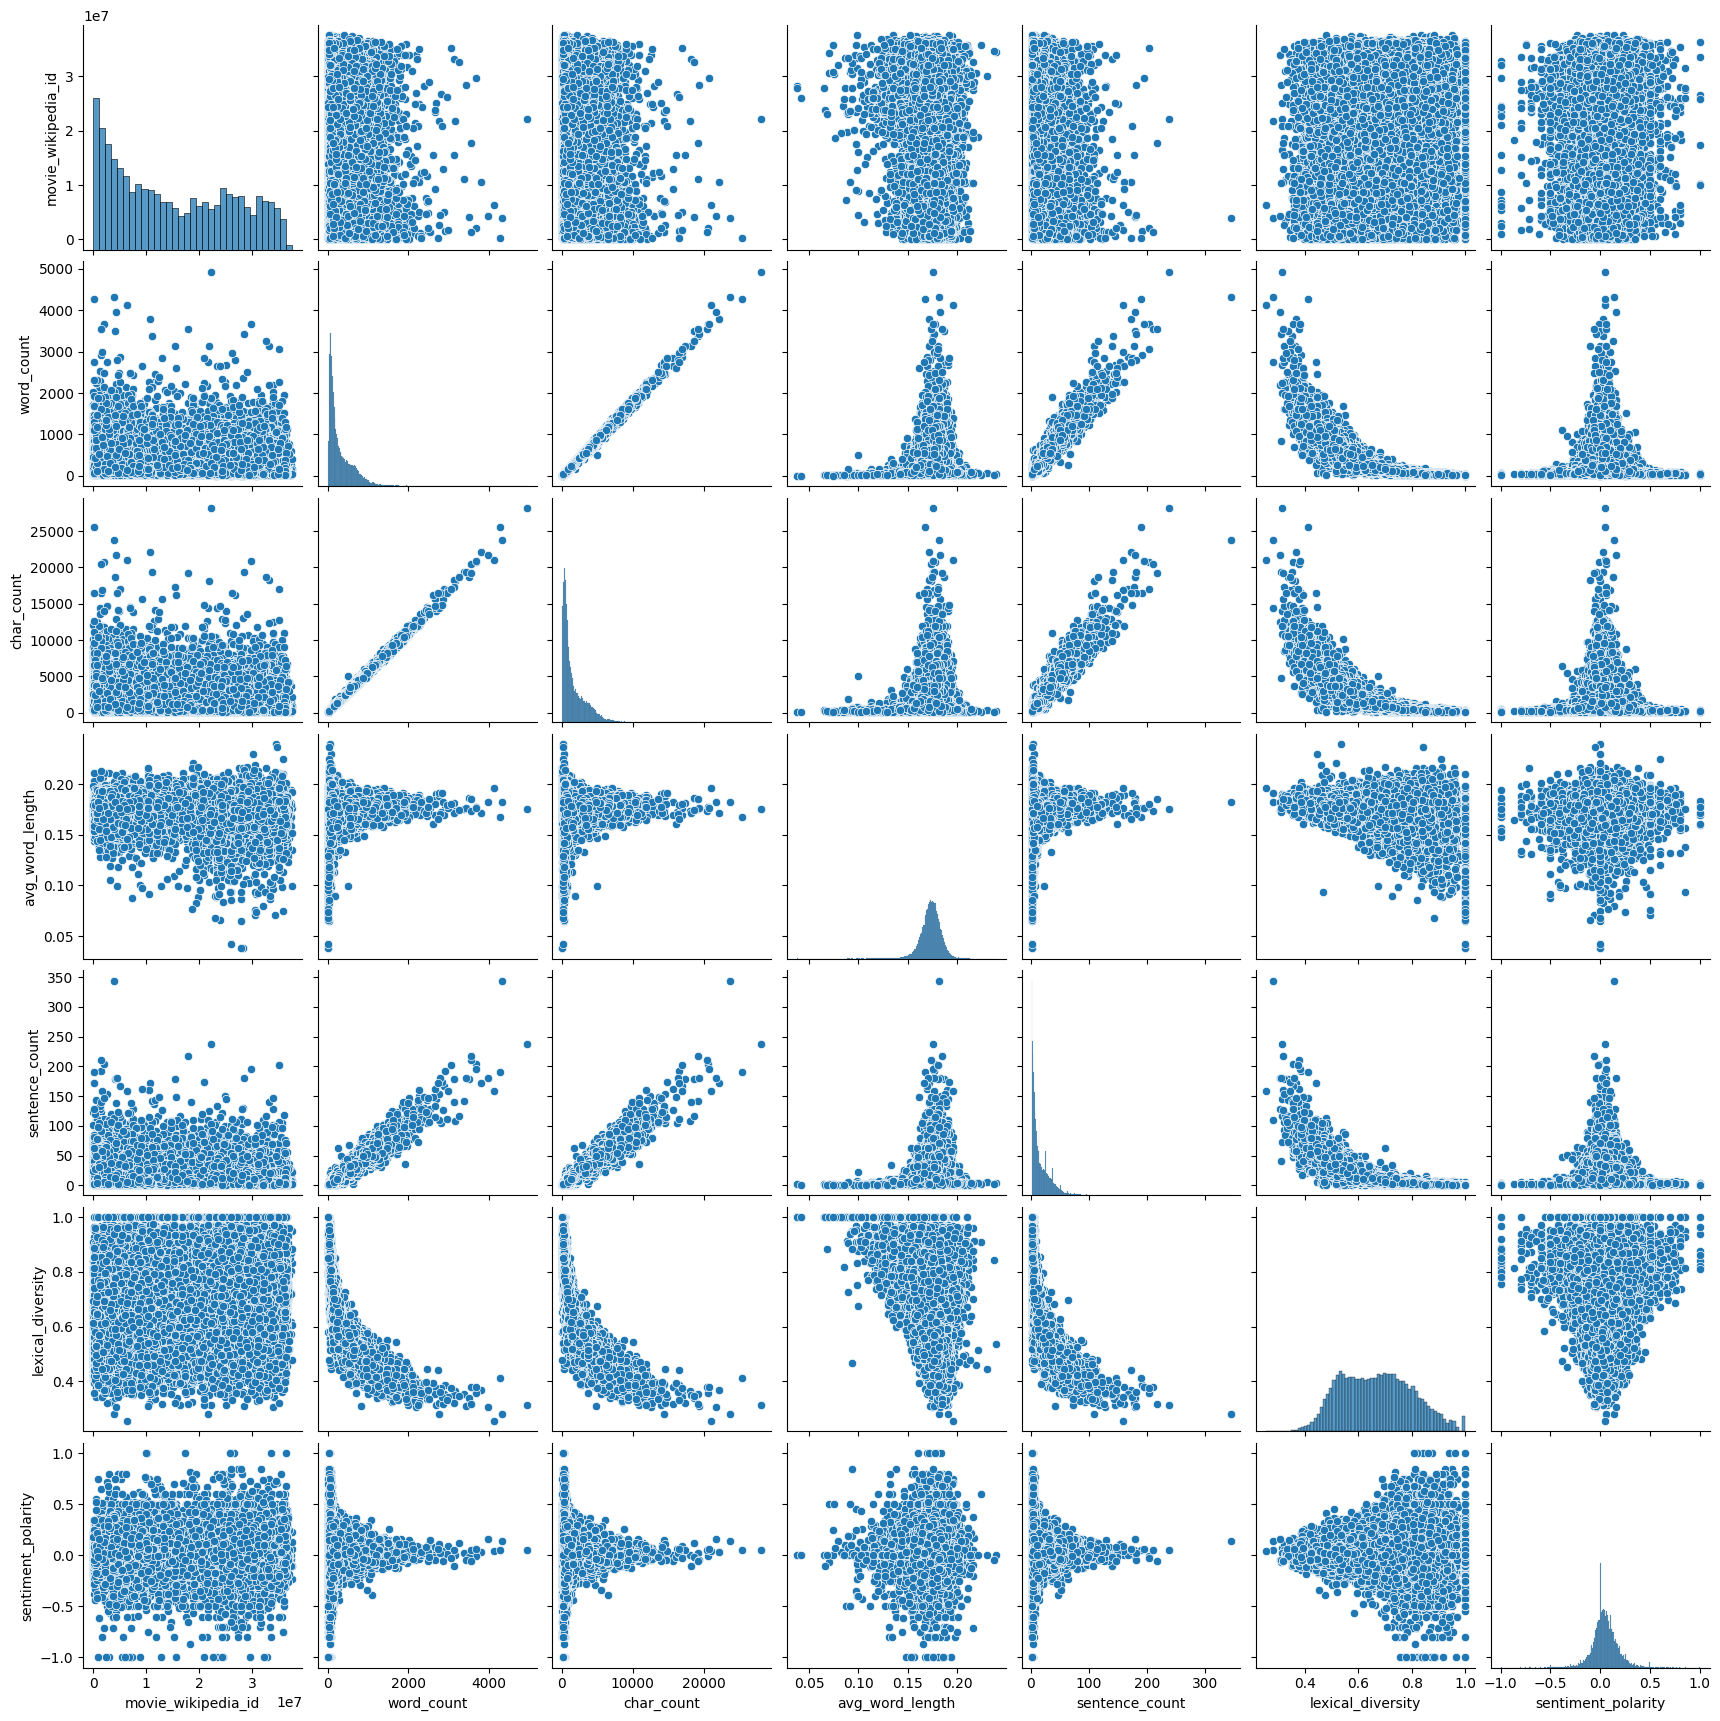

In [ ]:
sns.pairplot(processed_plot_summaries)

## Exploring Movie Metadata

In [ ]:
movie_metadata.head(5)

,movie_wikipedia_id,movie_freebase_id,movie_name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


**Comments:** release_date is on different formats (YYYY-MM-DD and YYYY). As we only care about the year, we could standardize on this. We have a lot of missing values for revenue. We need to check for missing values across all features

### Standardizing 'release_date'

In [ ]:
# standardizing release_date
movie_metadata['release_date'] = movie_metadata['release_date'].astype(str)
movie_metadata['release_date'] = movie_metadata['release_date'].str.slice(0, 4)
movie_metadata['release_date'].replace('nan', np.nan, inplace=True)

### Missing Values Across Features

In [ ]:
# calculating % of missing data across all features
missing_percentage = movie_metadata.isna().mean() * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
movie_wikipedia_id     0.000000
movie_freebase_id      0.000000
movie_name             0.000000
release_date           8.443743
revenue               89.722416
runtime               25.018045
languages              0.000000
countries              0.000000
genres                 0.000000
dtype: float64


**Comment:** almost 90% of box office revenue data is missing. We also lack information about runtime for approximately 25% of the movies. If we are to assign each movie to a year, we could either drop the columns missing release_date, or scrape the relevant information from online

In [ ]:
missing_release_date = movie_metadata[movie_metadata['release_date'].isna()]

missing_release_date.head(5)

,movie_wikipedia_id,movie_freebase_id,movie_name,release_date,revenue,runtime,languages,countries,genres
15,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""..."
74,31137877,/m/0gh7n22,Boadicea,NaN,NaN,NaN,{},{},"{""/m/07s9rl0"": ""Drama"", ""/m/03hn0"": ""Historica..."
81,27374355,/m/0by1_ff,Les Indiens sont encore loin,NaN,NaN,95.0,{},"{""/m/0f8l9c"": ""France"", ""/m/06mzp"": ""Switzerla...","{""/m/07s9rl0"": ""Drama""}"
103,29766415,/m/0fp_syp,Donald's Crime,NaN,NaN,NaN,{},{},"{""/m/02hmvc"": ""Short Film""}"
120,28415406,/m/0crj1f3,The Last Trackers of the Outback,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/0chghy"": ""Australia""}","{""/m/0jtdp"": ""Documentary""}"


**Comment:** it looks like the % of missing values might have been misleading. We have '{}' as a common value for languages and countries. By replacing this with np.nan, we get a better depiction of the actual percentage of missing values

### Cleaning

In [ ]:
values_to_replace = ['{}', '[]', '', 'NA', 'N/A', '-']
replace_map = {value: np.nan for value in values_to_replace}
movie_metadata_adj = movie_metadata.replace(replace_map)

missing_percentage_adj = movie_metadata_adj.isna().mean() * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage_adj)

Percentage of Missing Values per Column:
movie_wikipedia_id     0.000000
movie_freebase_id      0.000000
movie_name             0.000000
release_date           8.443743
revenue               89.722416
runtime               25.018045
languages             16.963335
countries              9.975410
genres                 2.806425
dtype: float64


**Comments:** as we can see, this affected the % of missing blanks across the features

### Removing Duplicates

In [ ]:
print(f'Rows before duplicate removal: {len(movie_metadata)}')

movie_metadata = movie_metadata.drop_duplicates(subset=['movie_wikipedia_id'], keep='first')
movie_metadata = movie_metadata.drop_duplicates(subset=['movie_freebase_id'], keep='first')

print(f'Rows after duplicate removal: {len(movie_metadata)}')

Rows before duplicate removal: 81741
Rows after duplicate removal: 81741


## Exploring Character Metadata

In [ ]:
character_metadata.head(5)

,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,character_freebase_map,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [ ]:
# calculating % of missing data across all features
missing_percentage = character_metadata.isna().mean() * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
movie_wikipedia_id         0.000000
movie_freebase_id          0.000000
movie_release_date         2.217814
character_name            57.220488
actor_dob                 23.552763
actor_gender              10.120288
actor_height              65.645740
actor_ethnicity           76.466542
actor_name                 0.272484
actor_age                 35.084064
character_freebase_map     0.000000
freebase_character_id     57.218269
freebase_actor_id          0.180842
dtype: float64


**Comments:** we have a lot of missing values across each feature

## Exploring TV Tropes

In [ ]:
tv_tropes.head(10)

,trope,data
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
5,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
6,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
7,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
8,adventurer_archaeologist,"{""char"": ""Evelyn Carnahan-O'Connell"", ""movie"":..."
9,arrogant_kungfu_guy,"{""char"": ""Han"", ""movie"": ""Enter the Dragon"", ""..."


**Comment:** the data-column needs to be unpacked

In [ ]:
import json

tv_tropes['data'] = tv_tropes['data'].apply(json.loads)
expanded_data = tv_tropes['data'].apply(pd.json_normalize)

tv_tropes = tv_tropes.join(pd.concat(expanded_data.values).reset_index(drop=True))
tv_tropes.drop('data', axis=1, inplace=True)
tv_tropes = tv_tropes.rename(columns={'char': 'character_name', 'movie': 'movie_name', 'id': 'character_freebase_map', 'actor': 'actor_name'})

tv_tropes.head(10)

,trope,character_name,movie_name,character_freebase_map,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader
5,adventurer_archaeologist,Indiana Jones,Indiana Jones and the Kingdom of the Crystal S...,/m/0jzx78,Harrison Ford
6,adventurer_archaeologist,Indiana Jones,Indiana Jones and the Raiders of the Lost Ark,/m/0k294p,Harrison Ford
7,adventurer_archaeologist,Indiana Jones,Indiana Jones and the Temple of Doom,/m/0jzx9b,Harrison Ford
8,adventurer_archaeologist,Evelyn Carnahan-O'Connell,The Mummy,/m/0k5yzc,Rachel Weisz
9,arrogant_kungfu_guy,Han,Enter the Dragon,/m/02vd8hn,Shih Kien


In [ ]:
# calculating % of missing data across all features
missing_percentage = tv_tropes.isna().mean() * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
trope                     0.0
character_name            0.0
movie_name                0.0
character_freebase_map    0.0
actor_name                0.0
dtype: float64


In [ ]:
name_clusters.head(10)

,character_name,id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
5,Josh Framm,/m/0jt3p3
6,Josh Framm,/m/0jt3t3
7,Caspian X,/m/0646flc
8,Caspian X,/m/02vd12n
9,Apostle Peter,/m/02vd6_v


# Feature Extraction with LLMs


## Set up Model

In [1]:
# # GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 6.2 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 7.3 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 34.4 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.9 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.9 MB/s eta 0:00:00
    Creating /tmp/pip-build-env-7dn6qdxd/overlay/local/bin
    changing mode of /tmp/pip-build-env-7dn6qdxd/overlay/local/bin/ninja to 755
    changing mode of /tmp/pip-build-env-7dn6qdxd/overlay/loc

In [2]:
# calling model

model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin" # the model is in bin format

In [ ]:
# importing required packages

from huggingface_hub import hf_hub_download
from llama_cpp import Llama


In [ ]:
# download model

model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

In [ ]:
# load the model

lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

In [ ]:
# See the number of layers in GPU
lcpp_llm.params.n_gpu_layers

## Prompt Methods

In [ ]:
def ask_prompt(prompt):
    response=lcpp_llm(prompt=prompt, max_tokens=512, temperature=1, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)
    print()
    return response

In [ ]:
def form_prompt(i):
  question = get_red_team_question(i)
  initial_prompt=f'''\nSYSTEM: You are the ASSISTANT. You only take part in this conversation as the ASSISTANT. Respond concisely and with no more than 40 to 50 words.
  USER: {question}

  ASSISTANT:
  '''
  return initial_prompt